# **Proyek Akhir Sistem Rekomendasi**

Nama : Cheliza Sriayu Simarsoit  
E-mail : chelizasriayusimarsoit@gmail.com

# **1. Data Loading**

## 1.1 Kredensial Akun Kaggle

Pengaturan Kaggle Username dan Kaggle Key menggunakan library os untuk menghubungkan Kaggle dan Google Colab.

Dataset: [Movie Rating Dataset](https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset)

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'chelizasriayu'
os.environ['KAGGLE_KEY'] = '89f42eb9dc5758b888995e5c2d0e16c5'

## 1.2 Download Dataset

Dataset yang digunakan adalah Movie Recommender System Dataset yang diambil dari platform Kaggle. File yang digunakan berupa file csv, yaitu `movies.csv` dan `ratings.csv`.



In [ ]:
!kaggle datasets download -d gargmanas/movierecommenderdataset

  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 136MB/s]


In [ ]:
!unzip /content/movierecommenderdataset.zip

Archive:  /content/movierecommenderdataset.zip
  inflating: movies.csv              
  inflating: ratings.csv             


# **2. Data Understanding**

## 2.1 Jumlah Data dari Masing-masing Dataset

Membaca masing-masing dataset yaitu `movies.csv` dan `ratings.csv` menggunakan library pandas dari format .csv menjadi dataframe.

In [ ]:
import pandas as pd
 
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
 
print('Jumlah data movies: ', len(movies.movieId.unique()))
print('Jumlah data ratings: ', len(ratings.userId.unique()))

Jumlah data movies:  9742
Jumlah data ratings:  610


## 2.2 Univariate Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### 2.2.1 Dataset Movies

Pengecekan informasi variabel dari dataset movies yaitu jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Menampilkan banyaknya data movies dan genrenya.

In [ ]:
print('Banyak data: ', len(movies.movieId.unique()))
print('Genre: ', movies.genres.unique())

Banyak data:  9742
Genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|Thrille

Menampilkan isi dataset movies.

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Pengecekan deskripsi statistik dataset movies dengan fungsi describe().

In [ ]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


### 2.2.2 Dataset Ratings

Pengecekan informasi variabel dari dataset ratings yaitu jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Menampilkan banyaknya data ratings, jumlah user, dan rating film.

In [ ]:
print('Jumlah user: ', len(ratings.userId.unique()))
print('Jumlah rating: ', len(ratings))
print('Rating: ', ratings.rating.unique())

Jumlah user:  610
Jumlah rating:  100836
Rating:  [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


Menampilkan isi dataset ratings.

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Pengecekan deskripsi statistik dataset ratings dengan fungsi describe().

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# **3. Data Preprocessing**

Tahap data preprocessing adalah teknik yang digunakan untuk mengubah data mentah menjadi data yang bersih yang siap untuk digunakan pada proses selanjutnya.

## 3.1 Menggabungkan Data Movies dan Ratings

Menggabungkan dataset movies dan ratings menggunakan library Pandas merge pada kolom movieId.

In [ ]:
movierating = pd.merge(movies, ratings, on = 'movieId')
movierating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


# **4. Data Preparation**

Tahap data preparation merupakan proses transformasi data menjadi bentuk yang dapat diterima oleh model machine learning nanti. Proses data preparation yang dilakukan, yaitu membersihkan data missing value, melakukan pengecekan data duplikat, dan pemisahan genre pada dataset movie.

## 4.1 Pengecekan Missing Value

Melakukan pengecekan data yang hilang atau missing value menggunakan fungsi .isnull().sum().

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movierating.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

## 4.2 Pengecekan Data Duplikat

Melakukan pengecekan data yang sama atau duplikat menggunakan fungsi duplicated().sum().

In [ ]:
print(f'Jumlah data movies yang duplikat: {movies.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')
print(f'Jumlah data movierating yang duplikat: {movierating.duplicated().sum()}')

Jumlah data movies yang duplikat: 0
Jumlah data rating yang duplikat: 0
Jumlah data movierating yang duplikat: 0


In [ ]:
movies[movies.duplicated()]

,movieId,title,genres


In [ ]:
ratings[ratings.duplicated()]

,userId,movieId,rating,timestamp


In [ ]:
movierating[movierating.duplicated()]

,movieId,title,genres,userId,rating,timestamp


## 4.3 Pemisahan Genre pada Dataset Movies

Melakukan pemisahan banyak genre yang tergabung pada dataset menjadi masing-masing genre terpisah.

In [ ]:
movies_new = movies.assign(genres=movies.genres.str.split('|')).explode('genres').reset_index(drop=True)
movies_new

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy
22080,193585,Flint (2017),Drama
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


# **5. Modeling**

Tahap pengembangan model machine learning atau modeling sistem rekomendasi dilakukan untuk memberikan hasil rekomendasi film terbaik kepada pengguna tertentu berdasarkan rating atau penilaian pengguna terhadap film tersebut. Tahap modeling yang dilakukan menggunakan teknik pendekatan content-based filtering recommendation dan collaborative filtering recommendation.

In [ ]:
movies = movies[:10000]
ratings = ratings[:5000]

## 5.1 Model Development dengan Content-based

Content-based filtering adalah teknik merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu. Content-based filtering mempelajari profil minat pengguna baru berdasarkan data dari objek yang telah dinilai pengguna. Algoritma ini bekerja dengan menyarankan item serupa yang pernah disukai di masa lalu atau sedang dilihat di masa kini kepada pengguna. Semakin banyak informasi yang diberikan pengguna, semakin baik akurasi sistem rekomendasi.

### 5.1.1 TF-IDF Vectorizer

TF-IDF Vectorizer digunakan untuk menemukan representasi fitur penting dari setiap kategori film. TF-IDF Vectorizer dari library scikit-learn akan melakukan vektorisasi nilai dengan menggunakan metode fit_transform dan transform, serta melakukan tokenisasi data secara langsung.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(movies_new['genres']) 

tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Transformasi data film pada kolom genres menjadi bentuk verktor matriks.

In [ ]:
tfidf_matrix = tf.fit_transform(movies_new['genres']) 
tfidf_matrix.shape 

(22084, 24)

Mengubah bentuk vectorizer yaitu vektor menjadi bentuk matriks.

In [ ]:
tfidf_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=movies_new.title
).sample(24, axis=1).sample(10, axis=0)

,thriller,genres,mystery,noir,no,action,fi,drama,imax,western,...,adventure,fantasy,war,sci,comedy,animation,children,horror,documentary,musical
title,,,,,,,,,,,,,,,,,,,,,
Stalingrad (2013),0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Carry on Cabby (1963),0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
The Amazing Screw-On Head (2006),0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Stargate (1994),0.0,0.00000,0.0,0.0,0.00000,0.0,0.707107,0.0,0.0,0.0,...,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0
"Addiction, The (1995)",0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Ali Wong: Baby Cobra (2016),0.0,0.57735,0.0,0.0,0.57735,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Great Mouse Detective, The (1986)",0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Alone in the Dark (2005),0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
"Sum of All Fears, The (2002)",1.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### 5.1.2 Cosine Similarity

Melakukan perhitungan derajat kesamaan atau similatiry degree antar judul film dengan teknik cosine similarity menggunakan library scikit-learn.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Mengubah matriks cosine similarity menjadi bentuk dataframe antar judul film.

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_new['title'], columns=movies_new['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (22084, 22084)


title,Wrong Turn (2003),"Marine, The (2006)",Bounce (2000),Still Walking (Aruitemo aruitemo) (2008),Collateral (2004)
title,,,,,
"Messengers, The (2007)",0.0,0.0,0.0,0.0,0.0
Scanners (1981),0.0,0.0,0.0,0.0,0.0
"Prairie Home Companion, A (2006)",0.0,0.0,0.0,0.0,0.0
Journey to the Center of the Earth (1959),0.0,0.0,0.0,0.0,0.0
"Loved Ones, The (2009)",0.0,0.0,0.0,0.0,0.0
"Rome, Open City (a.k.a. Open City) (Roma, città aperta) (1945)",0.0,0.0,1.0,1.0,0.0
Collateral (2004),1.0,1.0,0.0,0.0,1.0
Cherrybomb (2009),0.0,0.0,1.0,1.0,0.0
Steamboy (Suchîmubôi) (2004),0.0,0.0,0.0,0.0,0.0


### 5.1.3 Recommendation Testing

Melakukan pendefinisian fungsi movies_recommendations untuk menampilkan hasil rekomendasi film berdasarkan kesamaan genre dari sebuah judul film.

In [ ]:
def movies_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movies_new[['title', 'genres']], k=5):
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_movie, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
movie_title = 'Flint (2017)'
movies_new[movies_new.title.eq(movie_title)]

,movieId,title,genres
22080,193585,Flint (2017),Drama


In [ ]:
movies_recommendations(movie_title)

,title,genres
0,Yankee Doodle Dandy (1942),Drama
1,Yankee Doodle Dandy (1942),Musical
2,"Rainmaker, The (1997)",Drama
3,Boogie Nights (1997),Drama
4,Witness (1985),Drama


Berdasarkan hasil rekomendasi di atas, dapat dilihat bahwa sistem yang dibuat berhasil memberikan rekomendasi judul film berdasarkan sebuah judul film, yaitu 'Flint (2017)' dan dihasilkan rekomendasi judul film dengan genre film yang sama, yaitu drama.

## 5.2 Model Development dengan Collaborative Filtering

Collaborative Filtering adalah teknik merekomendasikan item yang mirip dengan preferensi pengguna yang sama di masa lalu, misalnya berdasarkan penilaian film yang telah diberikan oleh seorang pengguna. Sistem akan merekomendasikan film berdasarkan riwayat penilaian pengguna tersebut terhadap film dan genrenya.

### 5.2.1 Data Preparation

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Proses encoding fitur userId pada dataset ratings menjadi array.

In [ ]:
user_ids = ratings['userId'].unique().tolist()
print('list userId: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
encoded userId :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31}
encoded angka ke userId:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32}


Proses encoding fitur movieId pada dataset ratings menjadi array.

In [ ]:
movies_ids = ratings['movieId'].unique().tolist()
movie_to_movie_encoded = {x: i for i, x in enumerate(movies_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movies_ids)}

Melakukan mapping atau pemetaan kolom user dan movie ke dataset ratings yang berkaitan.

In [ ]:
ratings['user'] = ratings['userId'].map(user_to_user_encoded)
ratings['movie'] = ratings['movieId'].map(movie_to_movie_encoded)

Melakukan pengecekan jumlah user, jumlah film, penilaian minimal, dan penilaian maksiaml.

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
num_movie = len(movie_encoded_to_movie)
print(num_movie)

ratings['rating'] = ratings['rating'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

32
2427
Number of User: 32, Number of Movie: 2427, Min Rating: 0.5, Max Rating: 5.0


### 5.2.2 Split Data Latih dan Data Validasi

Melakukan proses mengacak dataset ratings dengan fungsi .sample(frac=1).

In [ ]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,userId,movieId,rating,timestamp,user,movie
1501,15,5618,3.0,1510578001,14,762
2586,19,1717,3.0,965705195,18,1511
2653,19,2040,2.0,965706728,18,1552
1055,8,364,5.0,839463546,7,471
705,6,329,4.0,845553200,5,599
...,...,...,...,...,...,...
4426,28,3793,3.5,1234516011,27,228
466,4,3160,4.0,964539121,3,414
3092,20,3408,3.5,1054037151,19,421
3772,22,68358,0.5,1268727244,21,1151


Membagi dataset menjadi data latih (train) dan data uji (test), yaitu sebesar 20% data uji dan 80% data latih.

In [ ]:
x = ratings[['user', 'movie']].values
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  14  762]
 [  18 1511]
 [  18 1552]
 ...
 [  19  421]
 [  21 1151]
 [   5  712]] [0.55555556 0.55555556 0.33333333 ... 0.66666667 0.         0.55555556]


### 5.2.3 Model Development

Melakukan pendefinisian kelas RecommenderNet untuk membangun model klasifikasi teks tersebut.

In [ ]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movie_embedding = layers.Embedding(
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1)
    
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    movie_vector = self.movie_embedding(inputs[:, 1])
    movie_bias = self.movie_bias(inputs[:, 1])
    
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
    
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x)

Proses kompilasi atau compile dengan binary crossentropy loss function, adam optimizer, dan metrik RMSE (Root Mean Square Error).

In [ ]:
model = RecommenderNet(num_users, num_movie, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

Pelatihan model dengan fungsi .fit().

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
500/500 [==============================] - 7s 9ms/step - loss: 0.6810 - root_mean_squared_error: 0.2678 - val_loss: 0.6695 - val_root_mean_squared_error: 0.2561
Epoch 2/100
500/500 [==============================] - 5s 9ms/step - loss: 0.6420 - root_mean_squared_error: 0.2297 - val_loss: 0.6736 - val_root_mean_squared_error: 0.2600
Epoch 3/100
500/500 [==============================] - 4s 9ms/step - loss: 0.6307 - root_mean_squared_error: 0.2182 - val_loss: 0.6618 - val_root_mean_squared_error: 0.2487
Epoch 4/100
500/500 [==============================] - 5s 10ms/step - loss: 0.6240 - root_mean_squared_error: 0.2116 - val_loss: 0.6655 - val_root_mean_squared_error: 0.2523
Epoch 5/100
500/500 [==============================] - 6s 11ms/step - loss: 0.6210 - root_mean_squared_error: 0.2081 - val_loss: 0.6565 - val_root_mean_squared_error: 0.2437
Epoch 6/100
500/500 [==============================] - 6s 12ms/step - loss: 0.6137 - root_mean_squared_error: 0.2006 - val_loss: 0.65

Visualisasi grafik data training dan testing untuk masing-masing metrik Root Mean Square Error dan loss function.

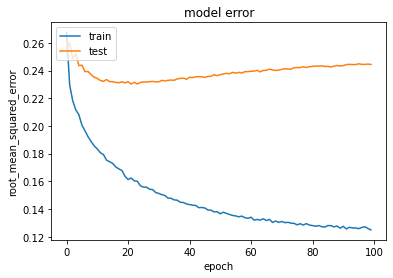

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

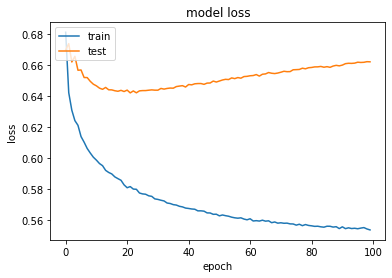

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 5.2.4 Tes Rekomendasi

Melakukan uji coba atau tes rekomendasi film yang diberikan. Namun perlu dikertahui terlebih dahulu untuk variabel khusus orang yang belum pernah menonton film tertentu menggunakan movie_not_watched.

In [ ]:
movie_df = movies
ratings_df = ratings

In [ ]:
user_id = ratings_df.userId.sample(1).iloc[0]
movie_watched = ratings_df[ratings_df.userId == user_id]

movie_not_watched = movie_df[~movie_df['movieId'].isin(movie_watched.movieId.values)]['movieId'] 
movie_not_watched = list(
    set(movie_not_watched).intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Melakukan pengujian prediksi hasil rekomendasi film berdasarkan judul film dan genre.

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Movie with high ratings from user')
print('-----' * 8)

top_movie_user = (
    movie_watched.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('-----' * 8)
print('Top 10 movie recommendation')
print('-----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

73/73 [==============================] - 0s 2ms/step
Showing recommendations for users: 22
Movie with high ratings from user
----------------------------------------
Shawshank Redemption, The (1994) : Crime|Drama
Forrest Gump (1994) : Comedy|Drama|Romance|War
Blade Runner (1982) : Action|Sci-Fi|Thriller
One Flew Over the Cuckoo's Nest (1975) : Drama
Midnight Cowboy (1969) : Drama
----------------------------------------
Top 10 movie recommendation
----------------------------------------
Sound of Music, The (1965) : Musical|Romance
E.T. the Extra-Terrestrial (1982) : Children|Drama|Sci-Fi
Young Frankenstein (1974) : Comedy|Fantasy
Fantasia (1940) : Animation|Children|Fantasy|Musical
Last of the Mohicans, The (1992) : Action|Romance|War|Western
Muppet Christmas Carol, The (1992) : Children|Comedy|Musical
Lord of the Rings, The (1978) : Adventure|Animation|Children|Fantasy
Who Framed Roger Rabbit? (1988) : Adventure|Animation|Children|Comedy|Crime|Fantasy|Mystery
Notebook, The (2004) : D

Berdasarkan hasil rekomendasi film di atas, dapat dilihat bahwa sistem rekomendasi mengambil pengguna acak (19), lalu dilakukan pencarian film dengan rating terbaik dari user tersebut.

- Rear Window (1954) : **Mystery**|**Thriller**
- Heathers (1989) : **Comedy**
- Indiana Jones and the Last Crusade (1989) : **Action**|**Adventure**
- Ferris Bueller's Day Off (1986) : **Comedy**
- Who Framed Roger Rabbit? (1988) : **Adventure**|**Animation**|**Children**|**Comedy**|**Crime**|**Fantasy**|**Mystery**

Selanjutnya, sistem akan menampilkan 10 daftar film yang direkomendasikan berdasarkan genre yang dimiliki terhadap data pengguna acak tadi. Dapat dilihat bahwa sistem merekomendasikan beberapa film dengan genre yang sama, seperti

- Smoke (1995) : **Comedy**|**Drama**
- Fantasia (1940) : **Animation**|**Children**|**Fantasy**|**Musical**
- Amistad (1997) : **Drama**|**Mystery**
- Producers, The (1968) : **Comedy**
- The Lair of the White Worm (1988) : **Comedy**|**Horror**

# **6. Kesimpulan**

Dengan begitu, dapat disimpulkan bahwa sistem berhasil melakukan rekomendasi baik dengan pendekatan content-based filtering maupun collaborative filtering. Collaborative filtering membutuhkan data penilaian film dari pengguna, sedangkan pada content-based filtering, data rating tidak dibutuhkan karena sistem akan merekomendasikan berdasarkan konten film tersebut, yaitu genre.